In [1]:
using Distributions
using StatsPlots
default(fmt = :png, titlefontsize = 9, guidefontsize = 9)
using Roots

x ⪅ y = x < y || x ≈ y

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function pvalue_sterne(k, n, p)
    bin = Binomial(n, p)
    sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ pdf(bin, k))
end

function pvalue_normal_approx(k, n, p)
    bin = Binomial(n, p)
    μ, σ² = mean(bin), var(bin)
    Z² = (k - μ)^2/σ²
    ccdf(Chisq(1), Z²)
end

function pvalue_bayes_clopper_pearson(k, n, p; α = 1.0, β = 1.0)
    beta = Beta(α + k, β + n - k)
    min(1, 2cdf(beta, p), 2ccdf(beta, p))
end

function pvalue_bayes_sterne(k, n, p; α = 1.0, β = 1.0)
    0 < p < 1 || return zero(p)
    beta = Beta(α + k, β + n - k)
    m = α + k > 1 ? (β + n - k > 1 ? mode(beta) : 1.0) : 0.0
    p ≈ m && return one(p)
    t0 = (m + (p ≥ m ? 0 : 1))/2
    q = find_zero(t -> logpdf(beta, t) - logpdf(beta, p), t0)
    if q ≈ p
        if m == 0
            ccdf(beta, p)
        elseif m == 1
            cdf(beta, p)
        else
            min(cdf(beta, p), ccdf(beta, p))
        end
    else
        a, b = minmax(p, q)
        cdf(beta, a) + ccdf(beta, b)
    end
end

function pvalue_bayes_normal_approx(k, n, p; α = 1.0, β = 1.0)
    beta = Beta(α + k, β + n - k)
    μ, σ² = mean(beta), var(beta)
    Z² = (p - μ)^2/σ²
    ccdf(Chisq(1), Z²)
end

function plot_pvalue_functions(k, n; α = 1, β = 1, xlim=(eps(), 1-eps()), xtick=0:0.1:1, F = trues(6), kwargs...)
    f1(p) = pvalue_clopper_pearson(k, n, p)
    g1(p) = pvalue_sterne(k, n, p)
    h1(p) = pvalue_normal_approx(k, n, p)
    f2(p) = pvalue_bayes_clopper_pearson(k, n, p; α, β)
    g2(p) = pvalue_bayes_sterne(k, n, p; α, β)
    h2(p) = pvalue_bayes_normal_approx(k, n, p; α, β)
    p = range(xlim..., 1000)
    plot()
    F[1] && plot!(p, f1; label="Clopper-Pearson", c=1)
    F[2] && plot!(p, g1; label="Sterne",          c=2)
    F[3] && plot!(p, h1; label="normal approx.",  c=3)
    F[4] && plot!(p, f2; label="Bayes Clopper-Pearson", c=4, ls = :dash)
    F[5] && plot!(p, g2; label="Bayes Sterne",          c=5, ls = :dash)
    F[6] && plot!(p, h2; label="Bayes normal approx.",  c=6, ls = :dash)
    title!("P-value functions for (k, n) = ($k, $n) and prior = Beta($α, $β)")
    plot!(; xlabel="p", ylabel="P-value")
    plot!(; xtick, ytick=0:0.05:1)
    plot!(; kwargs...)
end

plot_pvalue_functions (generic function with 1 method)

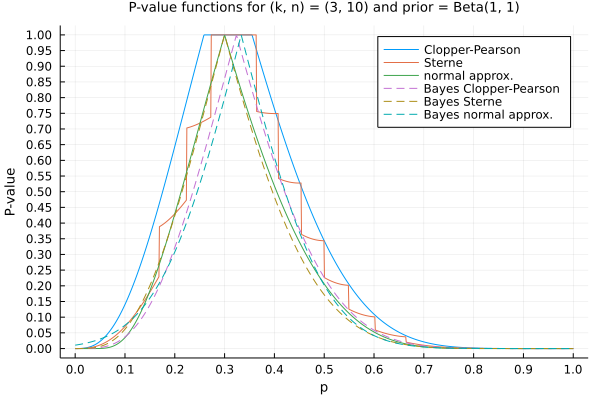

In [2]:
plot_pvalue_functions(3, 10)

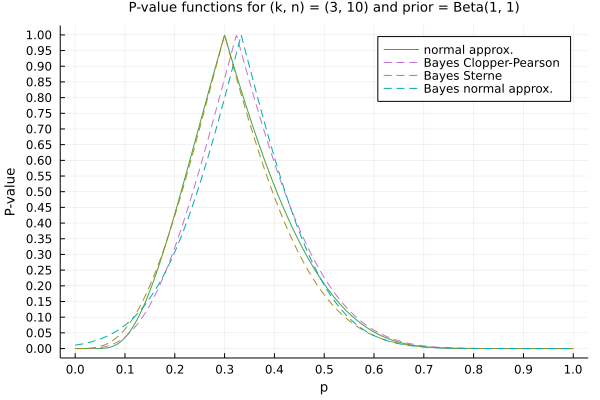

In [3]:
plot_pvalue_functions(3, 10; F = Bool[0,0,1,1,1,1])

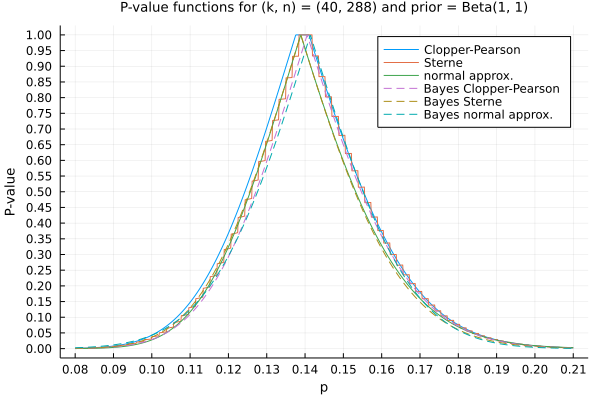

In [4]:
plot_pvalue_functions(40, 288; xlim = (0.08, 0.21), xtick=0:0.01:1)

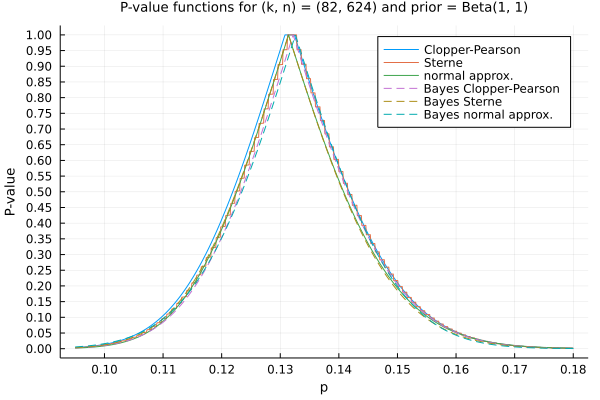

In [5]:
plot_pvalue_functions(82, 624; xlim = (0.095, 0.18), xtick=0:0.01:1)

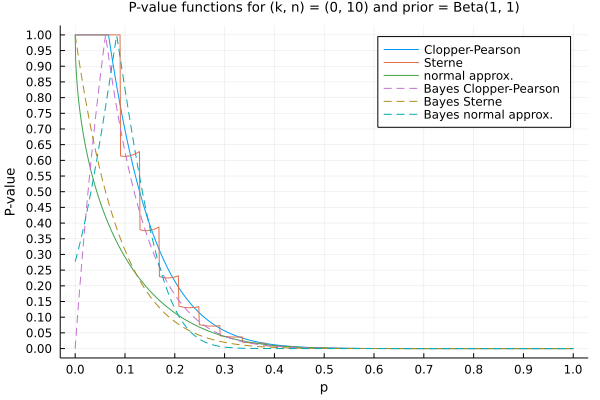

In [6]:
plot_pvalue_functions(0, 10)

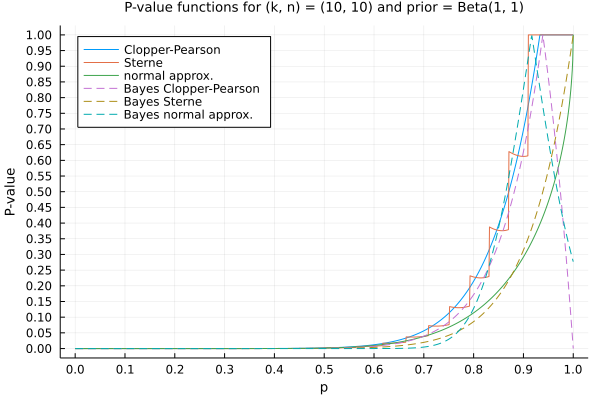

In [7]:
plot_pvalue_functions(10, 10; legend=:topleft)

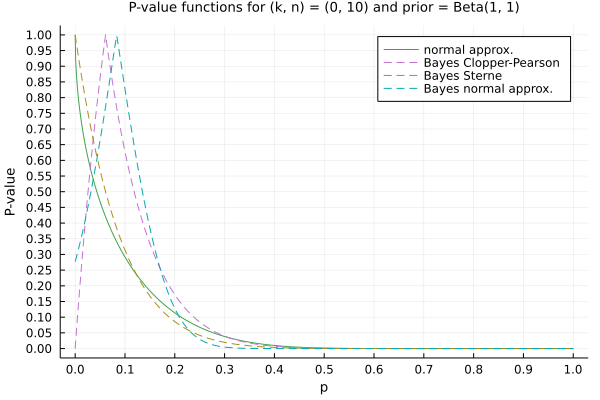

In [8]:
plot_pvalue_functions(0, 10, F = Bool[0,0,1,1,1,1])

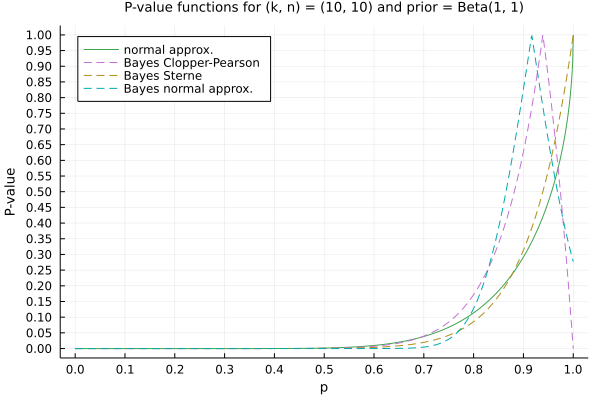

In [9]:
plot_pvalue_functions(10, 10, F = Bool[0,0,1,1,1,1], legend=:topleft)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=10.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=10.gif")
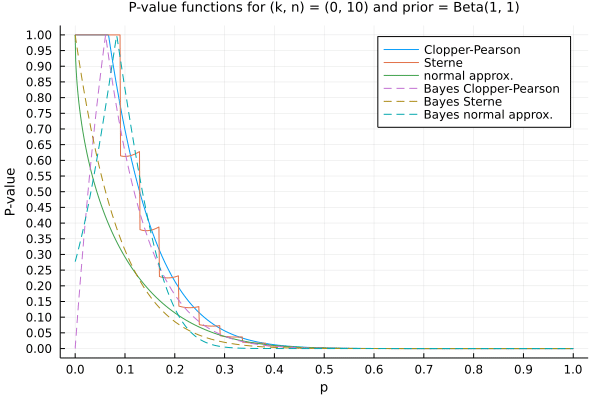

In [10]:
anim = @animate for k in 0:10
    plot_pvalue_functions(k, 10)
    plot!(legend = k > 5 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=10.gif"; fps=1)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=10_2.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=10_2.gif")
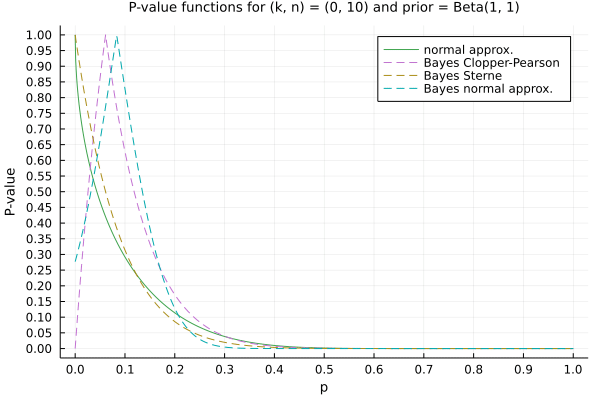

In [11]:
anim = @animate for k in 0:10
    plot_pvalue_functions(k, 10, F = Bool[0,0,1,1,1,1])
    plot!(legend = k > 5 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=10_2.gif"; fps=1)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=20.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=20.gif")
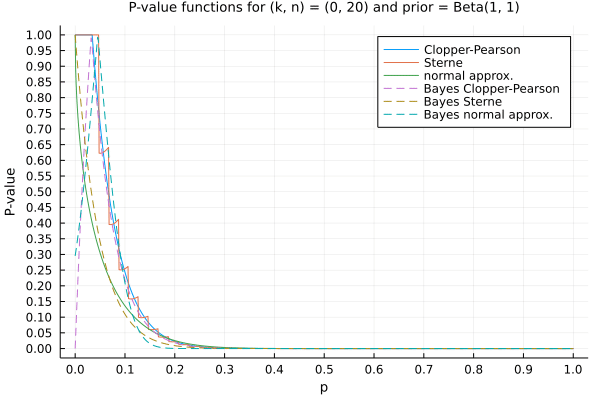

In [12]:
anim = @animate for k in 0:20
    plot_pvalue_functions(k, 20)
    plot!(legend = k > 10 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=20.gif"; fps=2)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=20_2.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=20_2.gif")
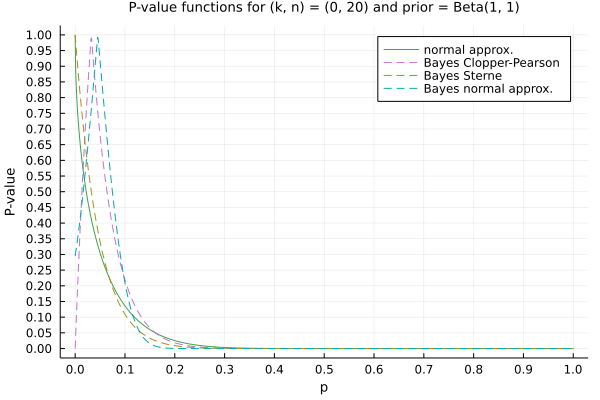

In [13]:
anim = @animate for k in 0:20
    plot_pvalue_functions(k, 20, F = Bool[0,0,1,1,1,1])
    plot!(legend = k > 10 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=20_2.gif"; fps=2)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=40.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=40.gif")
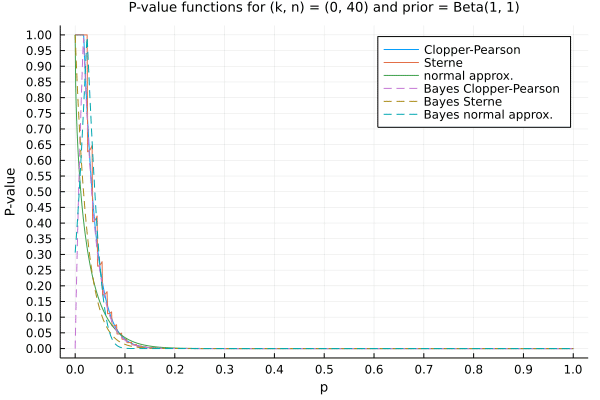

In [14]:
anim = @animate for k in 0:40
    plot_pvalue_functions(k, 40)
    plot!(legend = k > 20 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=40.gif"; fps=4)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=40_2.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=40_2.gif")
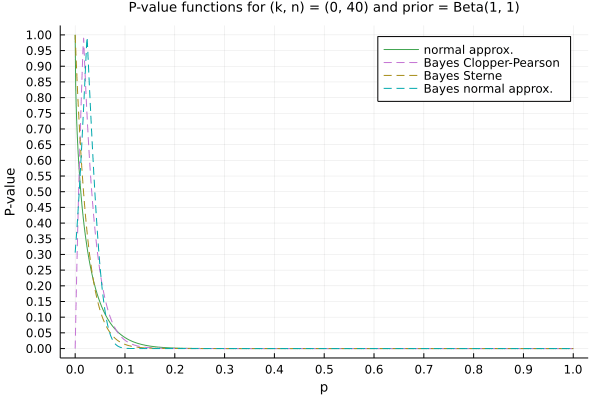

In [15]:
anim = @animate for k in 0:40
    plot_pvalue_functions(k, 40, F = Bool[0,0,1,1,1,1])
    plot!(legend = k > 20 ? :topleft : :topright)
end
gif(anim, "pvalue_functions_n=40_2.gif"; fps=4)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=1000_k=20.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=1000_k=20.gif")
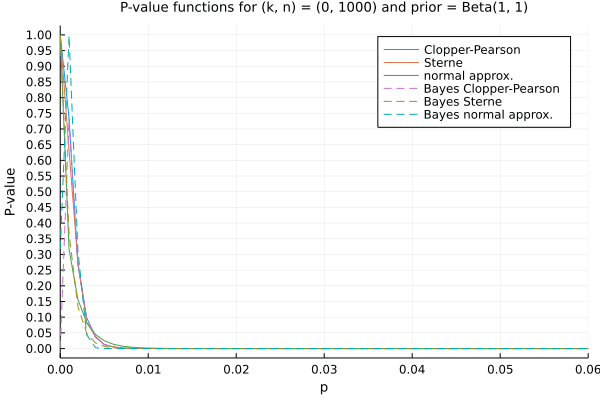

In [16]:
anim = @animate for k in 0:40
    plot_pvalue_functions(k, 1000)
    plot!(legend = k > 30 ? :topleft : :topright)
    plot!(xlim = (0.0, 0.06), xtick=0:0.01:1)
end
gif(anim, "pvalue_functions_n=1000_k=20.gif"; fps=4)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\public\0029\pvalue_functions_n=1000_k=20.gif
└ @ Plots D:\.julia\packages\Plots\5S9Hg\src\animation.jl:114


Plots.AnimatedGif("D:\\OneDrive\\public\\0029\\pvalue_functions_n=1000_k=20.gif")
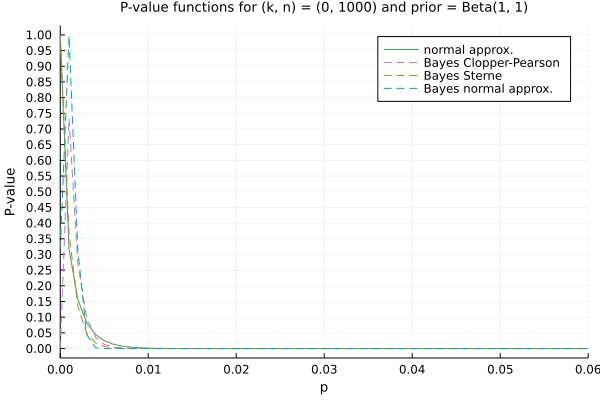

In [17]:
anim = @animate for k in 0:40
    plot_pvalue_functions(k, 1000, F = Bool[0,0,1,1,1,1])
    plot!(legend = k > 30 ? :topleft : :topright)
    plot!(xlim = (0.0, 0.06), xtick=0:0.01:1)
end
gif(anim, "pvalue_functions_n=1000_k=20.gif"; fps=4)

In [18]:
function plot_pvalues(k, n, p; α = 1, β = 1, r = x -> round(x; digits=4), xlimP=nothing, xlimB=nothing, kwargs...)
    bin = Binomial(n, p)
    m = mode(bin)
    f(x) = pdf(bin, round(Int, x))
    μ, σ = mean(bin), std(bin)
    
    normal = Normal(μ, σ)
    ff(x) = pdf(normal, x)
    xmin, xmax = μ - 4.5σ, μ + 4.5σ
    
    if k ≤ m
        i = findfirst(x -> pdf(bin, x) ⪅ pdf(bin, k) , m:n)
        l = isnothing(i) ? n+1 : (m:n)[i]
        xlim = isnothing(xlimP) ? (min(0, xmin) - 0.51, max(n, k + l, xmax) + 0.51) : xlimP
    else
        i = findfirst(x -> pdf(bin, x) ⪅ pdf(bin, k) , m:-1:0)
        l = isnothing(i) ? -1 : (m:-1:0)[i]
        xlim = isnothing(xlimP) ? (min(0, k + l - n, xmin) - 0.51, max(n, xmax) + 0.51) : xlimP
    end
    if k ≥ 10 && n - k ≥ 10
        xlim = isnothing(xlimP) ? (max(-0.51, xmin), min(n + 0.51, xmax)) : xlimP
    end
    
    P1 = plot(; xlim)
    plot!(-0.51:0.01:n+0.51, f ; c = :black, label="Bin($n, $p)")
    if k ≤ m
        x = -0.50:0.01:k+0.49
        plot!(x, f; c = :black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!((k + l) .- x, f.(x); c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
        plot!([k + 0.5, l - 0.5], fill(pdf(bin, k), 2); c=:blue, label="")
    else
        x = k-0.49:0.01:n+0.50
        plot!(x, f; c = :black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!((k + l) .- x, f.(x); c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
        plot!([l + 0.5, k - 0.5], fill(f(k), 2); c=:blue, label="")
    end
    pval = pvalue_clopper_pearson(k, n, p)
    title!("Clopper-Pearson P-value = $(r(pval)) of k = $k")

    P2 = plot(; xlim)
    plot!(-0.51:0.01:n+0.51, f ; c = :black, label="Bin($n, $p)")
    if k ≤ m
        x = -0.50:0.01:k+0.49
        plot!(x, f; c = :black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(l-0.51:0.01:n+0.51, f; c = :black, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
        plot!([k + 0.5, l - 0.5], fill(pdf(bin, k), 2); c=:blue, label="")
    else
        x = k-0.49:0.01:n+0.50
        plot!(x, f; c = :black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(-0.51:0.01:l+0.51, f; c = :black, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
        plot!([l + 0.5, k - 0.5], fill(f(k), 2); c=:blue, label="")
    end
    pval = pvalue_sterne(k, n, p)
    title!("Sterne P-value = $(r(pval)) of k = $k")

    P3 = plot(; xlim)
    plot!(-0.51:0.01:n+0.51, f ; c = :black, label="Bin($n, $p)")
    plot!(ff, xmin, xmax; c = :blue, ls=:dash, label="")
    if k ≤ m
        plot!(ff, xmin, k; c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(ff, 2μ-k, xmax; c = :blue, ls=:dash, lw=0, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    else
        plot!(ff, k, xmax; c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(ff, xmin, 2μ-k; c = :blue, ls=:dash, lw=0, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    end
    pval = pvalue_normal_approx(k, n, p)
    title!("normal approx. P-value = $(r(pval)) of k = $k")
    
    beta = Beta(α + k, β + n - k)
    g(x) = pdf(beta, x)
    m = mode(beta)
    t0 = (m + (p ≥ m ? 0 : 1))/2
    q = find_zero(t -> logpdf(beta, t) - logpdf(beta, p), t0)
    
    μ, σ = mean(beta), std(beta)
    normal = Normal(μ, σ)
    gg(x) = pdf(normal, x)
    xmin, xmax = μ - 4.5σ, μ + 4.5σ
    
    if p ≤ m
        xlim = isnothing(xlimB) ? (min(0, xmin) - 0.02, min(1 + σ, max(1, p + q, xmax) + 0.02)) : xlimB
    else
        xlim = isnothing(xlimB) ? (max(-σ, min(0, p + q - 1, xmin) - 0.02), max(1, xmax) + 0.02) : xlimB
    end
    if k ≥ 10 && n - k ≥ 10
        xlim = (max(-0.02, xmin), min(1.02, xmax))
    end
    
    Q1 = plot(; xlim)
    plot!(g, 0, 1; c=:black, label="Beta($(α + k), $(β + n - k))")
    if p ≤ m
        x = 0:0.001:p
        plot!(x, g; c=:black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!((p + q) .- x, g.(x); c=:blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    else
        x = p:0.001:1
        plot!(x, g; c=:black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!((p + q) .- x, g.(x); c=:blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    end
    plot!([p, q], fill(g(p), 2); c=:blue, label="")
    pval = pvalue_bayes_clopper_pearson(k, n, p; α, β)
    title!("Bayesian C.-P. P-value = $(r(pval)) of p = $p")
    
    Q2 = plot(; xlim)
    plot!(g, 0, 1; c=:black, label="Beta($(α + k), $(β + n - k))")
    if p ≤ m
        plot!(g, 0, p; c=:black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(g, q, 1; c=:blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    else
        plot!(g, p, 1; c=:black, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(g, 0, q; c=:blue, ls=:dash, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    end
    plot!([p, q], fill(g(p), 2); c=:blue, label="")
    pval = pvalue_bayes_sterne(k, n, p; α, β)
    title!("Bayesian Sterne P-value = $(r(pval)) of p = $p")

    Q3 = plot(; xlim)
    plot!(g, 0, 1; c=:black, label="Beta($(α + k), $(β + n - k))")
    plot!(gg, xmin, xmax; c = :blue, ls=:dash, label="")
    if p ≤ m
        plot!(gg, xmin, p; c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(gg, 2μ - p, xmax; c = :blue, ls=:dash, lw=0, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    else
        plot!(gg, p, xmax; c = :blue, ls=:dash, label="", fillrange=0, fillcolor=:red, fillalpha=0.3)
        plot!(gg, xmin, 2μ - p; c = :blue, ls=:dash, lw=0, label="", fillrange=0, fillcolor=:blue, fillalpha=0.3)
    end
    pval = pvalue_bayes_normal_approx(k, n, p; α, β)
    title!("Bayesian normal approx. P-value = $(r(pval)) of p = $p")

    plot(P1, Q1, P2, Q2, P3, Q3; size=(800, 700), layout=(3, 2), kwargs...)
end

plot_pvalues (generic function with 1 method)

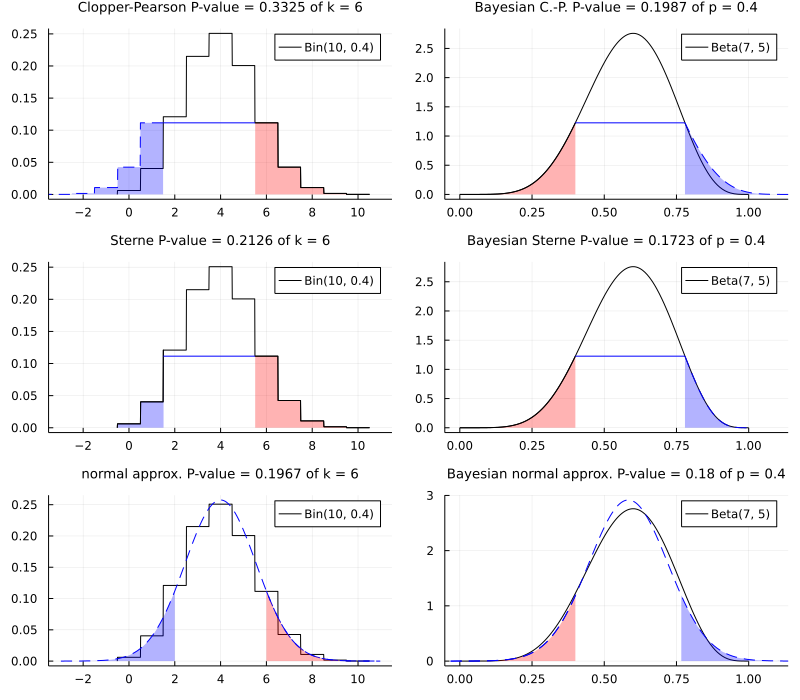

In [19]:
plot_pvalues(6, 10, 0.4)

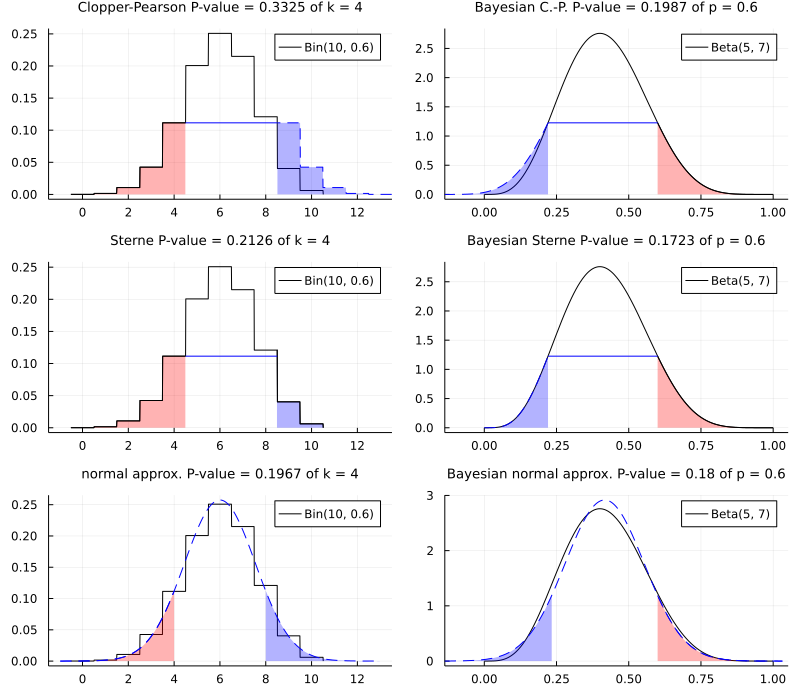

In [20]:
plot_pvalues(4, 10, 0.6)

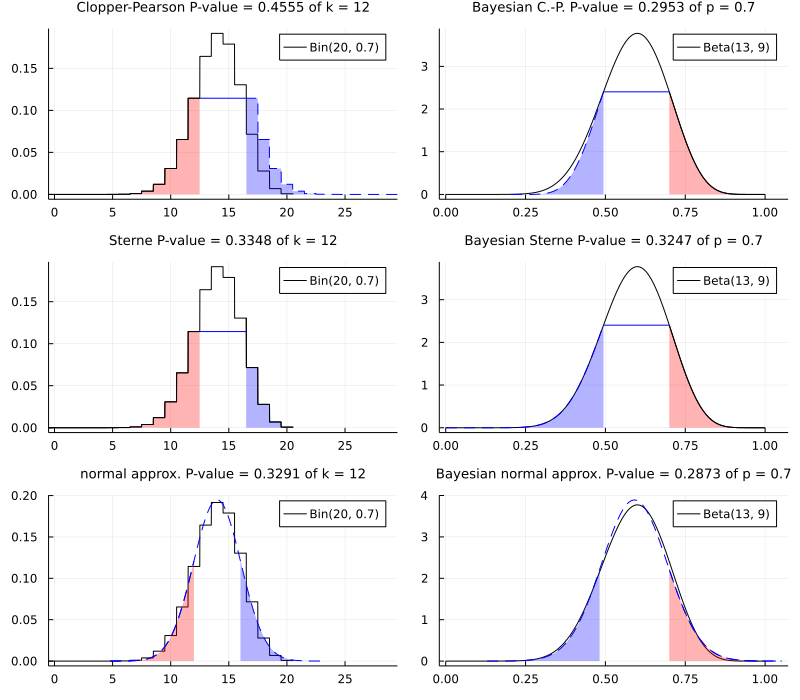

In [21]:
plot_pvalues(12, 20, 0.7)

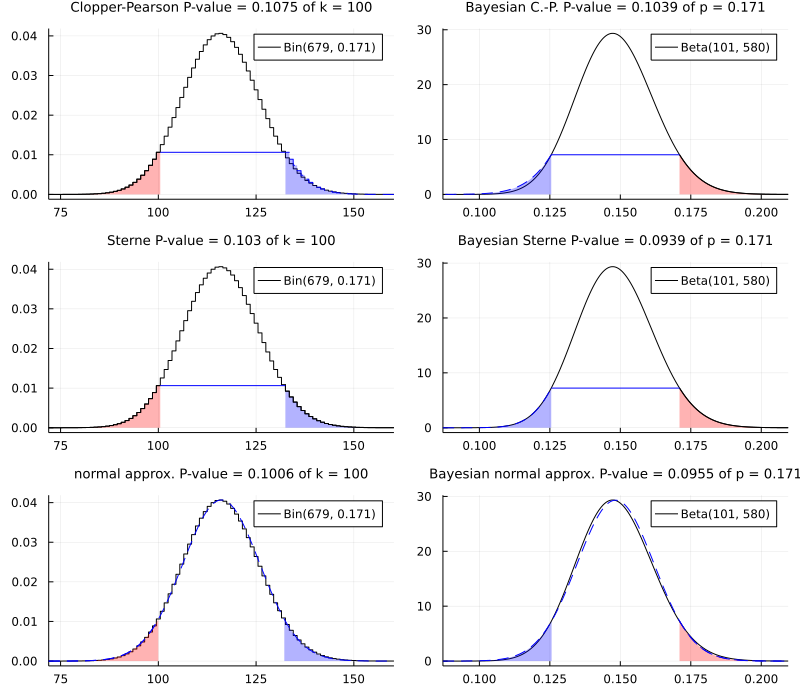

In [22]:
plot_pvalues(100, 679, 0.171)

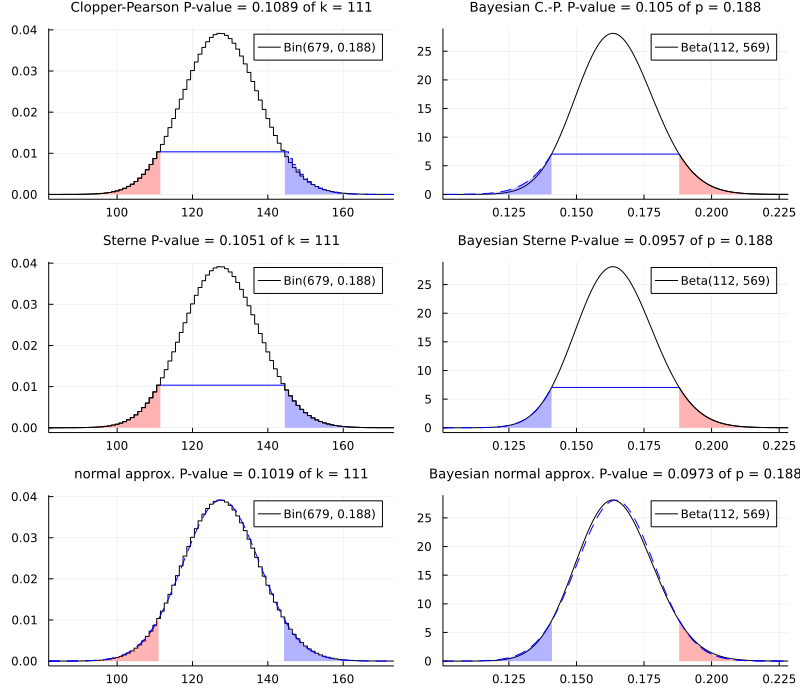

In [23]:
plot_pvalues(111, 679, 0.188)

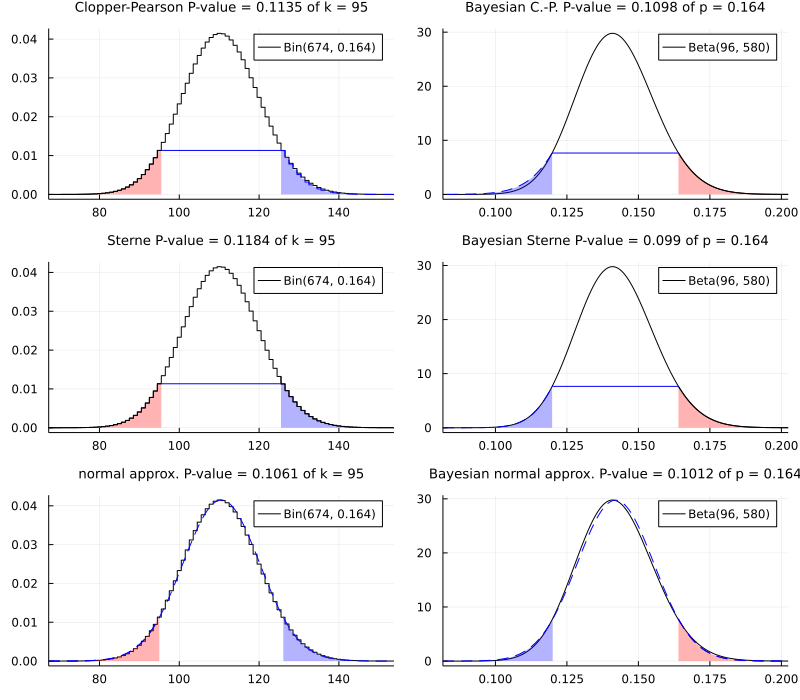

In [24]:
plot_pvalues(95, 674, 0.164)

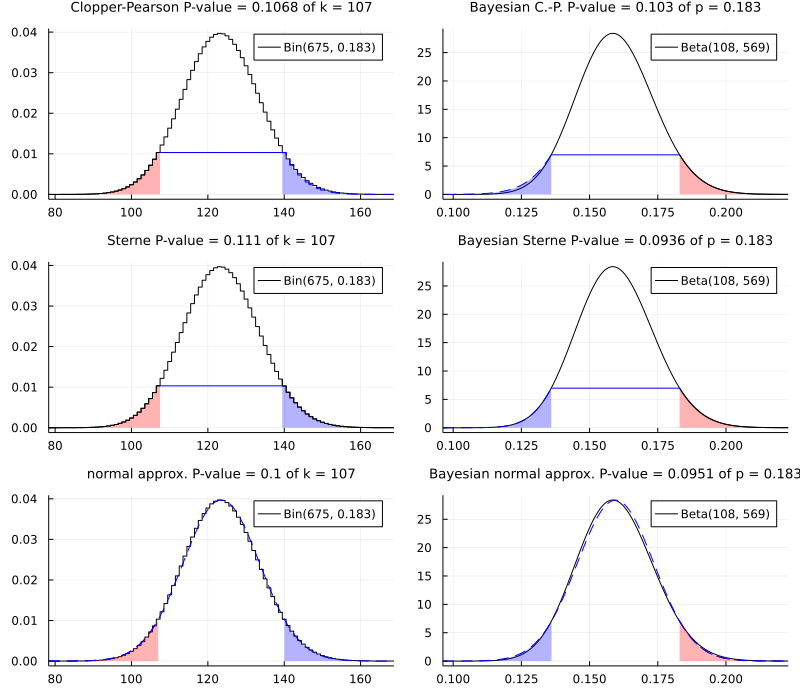

In [25]:
plot_pvalues(107, 675, 0.183)

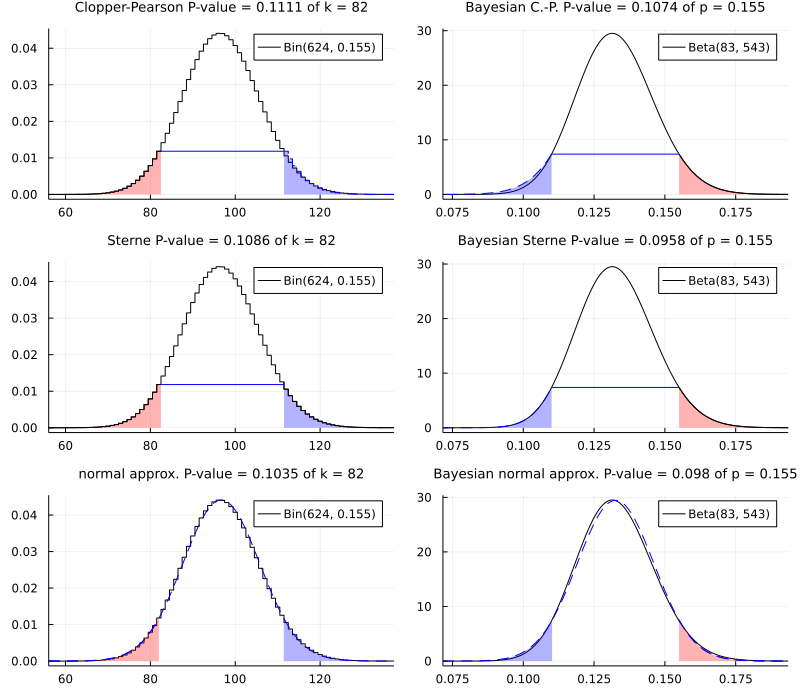

In [26]:
plot_pvalues(82, 624, 0.155)

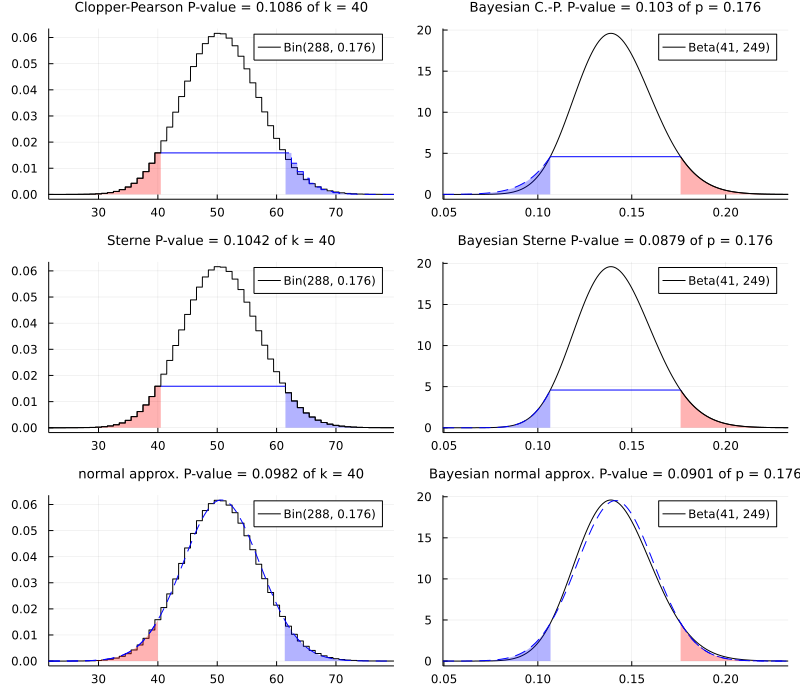

In [27]:
plot_pvalues(40, 288, 0.176)

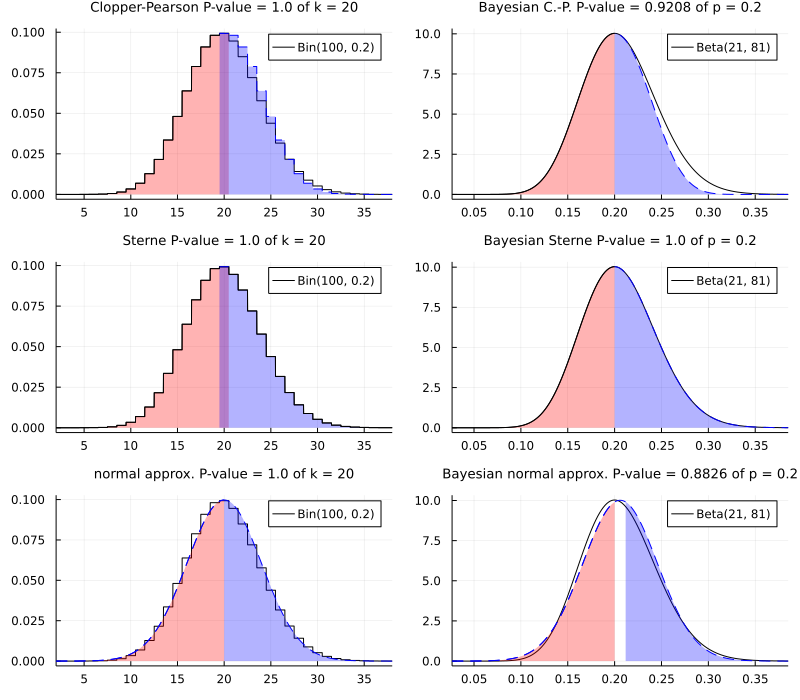

In [28]:
plot_pvalues(20, 100, 0.2)